# Michael Tait Final Report


## Questions:
- How many majors fall into each category?  
***
- Which majors are most/least common? 
***
- Is the difference between median and P75th similar between all major categories or is it all relative to pay scale? 
***
- What major categories provide the lowest unemployment rate? 
***
- Is the data actually accurate for analysis?
***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
major_data = pd.read_csv('/mnt/c/Users/Public/Documents/dev/course-materials/final-project-template/data/all-ages.csv')

In [3]:
major_data.shape

(173, 11)

Using isnull().sum(), I found that there was no missing data within the dataset!

In [4]:
major_data.isnull().sum().sum()

0

## **Onto my focus questions!**

Majors in each category..
* Found with value_counts()

In [5]:
major_data['Major_category'].value_counts()

Engineering                            29
Education                              16
Humanities & Liberal Arts              15
Biology & Life Science                 14
Business                               13
Health                                 12
Computers & Mathematics                11
Agriculture & Natural Resources        10
Physical Sciences                      10
Psychology & Social Work                9
Social Science                          9
Arts                                    8
Industrial Arts & Consumer Services     7
Law & Public Policy                     5
Communications & Journalism             4
Interdisciplinary                       1
Name: Major_category, dtype: int64

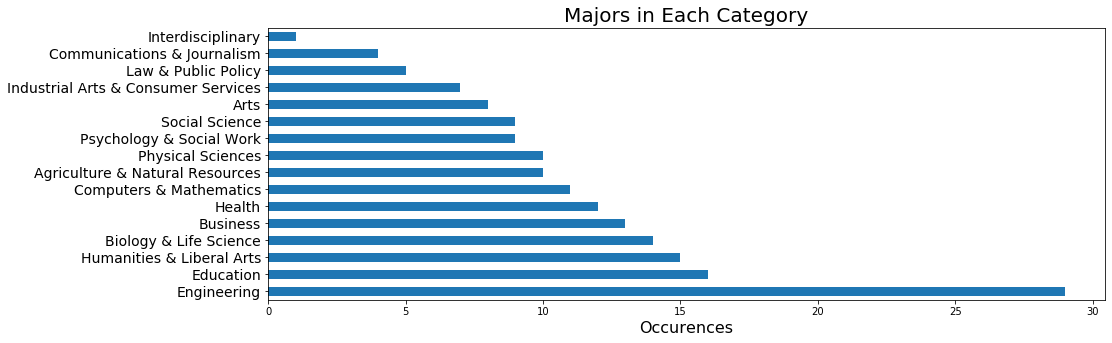

In [16]:
major_data['Major_category'].value_counts().plot(kind='barh', figsize=(15,5))
plt.yticks(fontsize=14),plt.title('Majors in Each Category', fontsize=20), plt.xlabel('Occurences', fontsize=16);

## **Next up..**

Which majors are most/least common?

In [7]:
pd.DataFrame(major_data[(major_data['Total'] > 750000)]['Major'])

,Major
13,COMMUNICATIONS
20,COMPUTER SCIENCE
25,GENERAL EDUCATION
28,ELEMENTARY EDUCATION
73,ENGLISH LANGUAGE AND LITERATURE
78,BIOLOGY
114,PSYCHOLOGY
121,CRIMINAL JUSTICE AND FIRE PROTECTION
127,ECONOMICS
153,NURSING


Nursing had the highest total in the dataset.. by almost a million!

In [8]:
pd.DataFrame(major_data[major_data['Major'] == 'NURSING']['Total'])

,Total
153,1769892


In [9]:
pd.DataFrame(major_data[(major_data['Total'] < 7500)]['Major'])

,Major
6,SOIL SCIENCE
26,EDUCATIONAL ADMINISTRATION AND SUPERVISION
27,SCHOOL STUDENT COUNSELING
51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING
83,GENETICS
85,PHARMACOLOGY
93,MILITARY TECHNOLOGIES
97,MATHEMATICS AND COMPUTER SCIENCE
98,COGNITIVE SCIENCE AND BIOPSYCHOLOGY
104,ASTRONOMY AND ASTROPHYSICS



## Difference between P75th and Median Wages 


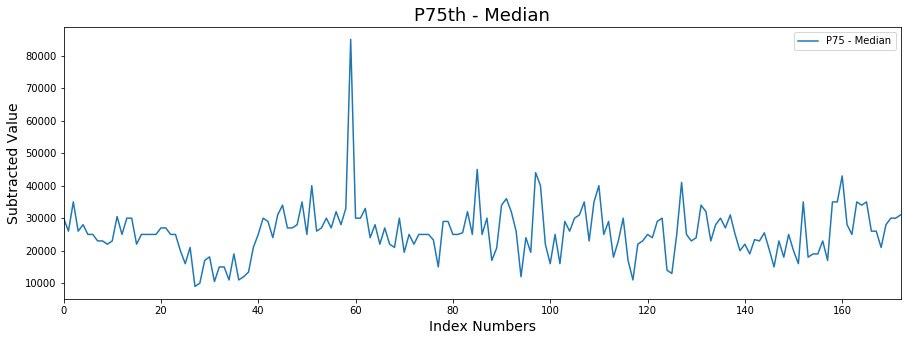

In [17]:
df1 = major_data['P75th']
df2 = major_data['Median']
major_data['P75 - Median'] = df1 - df2
major_data[['Major', 'P75 - Median']].plot(figsize=(15,5))
major_data[['Major', 'P75 - Median']].iloc[pd.np.r_[59:60, 85:86, 97:98, 127:128, 160:161]]
plt.title('P75th - Median', fontsize=18), plt.xlabel('Index Numbers', fontsize=14), plt.ylabel('Subtracted Value', fontsize=14);

1. Series.iloc is used for indexing by position using integers.
2. Numpy r_ allowed my to stack the slices within the same DataFrame indeces, whereas I couldn't stack these five data points before.

I wanted to show how there isn't a common trend for high paying jobs and the difference of pay.. As you can see pharmacology(which I would imagine to be higher) and economics made the list for the biggest difference.
#### Median Pay
*** 
Petroleum Engineering = 125,000
***
Pharmacology = 60,000
***
Mathematics and Computer Science = 92,000
***
Economics = 69,000
***
Actuarial Science = 72,000

## Highest & Lowest Unemployment Rates

,0
Engineering,0.050630
Education,0.046762
Humanities & Liberal Arts,0.069429
Biology & Life Science,0.049936
Business,0.054496
Health,0.047209
Computers & Mathematics,0.059437
Physical Sciences,0.054541
Agriculture & Natural Resources,0.039569
Social Science,0.065686


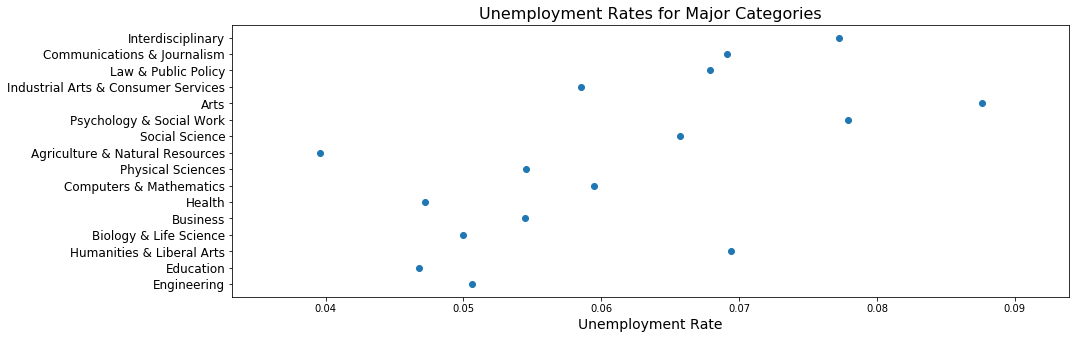

In [19]:
list_of_categories = ['Engineering', 'Education', 'Humanities & Liberal Arts', 
                'Biology & Life Science', 'Business', 'Health',
                'Computers & Mathematics', 'Physical Sciences', 
                'Agriculture & Natural Resources', 'Social Science',
                'Psychology & Social Work', 'Arts',                         
                'Industrial Arts & Consumer Services', 'Law & Public Policy',
                'Communications & Journalism',           
                'Interdisciplinary']

empty_list = []
for i in list_of_categories:
    val = major_data[major_data['Major_category'] == (i)]['Unemployment_rate'].mean()
    empty_list.append(val)
plt.figure(figsize=(15,5))    
plt.scatter(empty_list, list_of_categories), plt.title('Unemployment Rates for Major Categories', fontsize=16), \
                                             plt.yticks(fontsize=12), \
                                             plt.xlabel('Unemployment Rate', fontsize=14);


mean_list = []
for i in list_of_categories:
    value = major_data[major_data['Major_category'] == (i)]['Unemployment_rate'].mean()
    mean_list.append(value)
pd.DataFrame(mean_list, list_of_categories)

## Is this data good?

For the most part! Below shows a couple pieces of data that may be unreliable due to no unemployment values.

In [12]:
major_data[major_data['Unemployment_rate'] == 0]

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,P75 - Median
26,2301,EDUCATIONAL ADMINISTRATION AND SUPERVISION,Education,4037,3113,2468,0,0.0,58000,44750,79000.0,21000.0
51,2411,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,3350,0,0.0,85000,55000,125000.0,40000.0


The most qualifying part of the dataset is the amount of data.

## Recommendations ## 

If you were to get a major nowadays, I would recommend using this data to find one with a large 'total' and a low unemployment rate! Engineering, health, agriculture, and education are all great choices.